# 1. Library Import

In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score #, root_mean_squared_error

# 2. Data Processing, Analysing, and Visualisation

In [2]:
sogaAQhap = pd.read_csv('../raw_data/soga_datasets/air_quality_household_air_pollution_from_solid_fuels.csv')
sogaAQno2 = pd.read_csv('../raw_data/soga_datasets/air_quality_no2_nitrogen_dioxide_pollution.csv')
sogaAQo3 = pd.read_csv('../raw_data/soga_datasets/air_quality_ozone_ambient_ozone_pollution.csv')
sogaAQpm25 = pd.read_csv('../raw_data/soga_datasets/air_quality_pm2.5_ambient_particulate_matter_pollution.csv')
sogaHITotalAirPollu = pd.read_csv('../raw_data/soga_datasets/health_impact_dalys_rate_air_pollution.csv')
sogaHIhap = pd.read_csv('../raw_data/soga_datasets/health_impact_dalys_rate_household_air_pollution_from_solid_fuels.csv')
sogaHIo3 = pd.read_csv('../raw_data/soga_datasets/health_impact_dalys_rate_ozone_ambient_ozone_pollution.csv')
sogaHIno2 = pd.read_csv('../raw_data/soga_datasets/health_quality_dalys_rate_no2_nitrogen_dioxide_pollution.csv')
sogaHIpm25 = pd.read_csv('../raw_data/soga_datasets/health_impact_dalys_rate_pm2.5_ambient_particulate_matter_pollution.csv')

## 2.1. Format tabular structure

In [3]:
def value_format(dataset):
    # Updated regex to remove both leading `="` and trailing `"`
    dataset = dataset.replace(to_replace=r'="|"$', value="", regex=True)
    return dataset

def columns_format(dataset):
    # Clean column names to remove `="` and `"`
    dataset.columns = dataset.columns.str.replace(r'="', '', regex=True).str.replace(r'"', '').str.strip()
    return dataset  

In [4]:
sogaAQ = pd.concat([sogaAQno2, sogaAQo3, sogaAQhap, sogaAQpm25])
sogaHI = pd.concat([sogaHIno2, sogaHIo3, sogaHIhap, sogaHIpm25, sogaHITotalAirPollu])

columns_format(sogaAQ)
columns_format(sogaHI)
sogaAQ = value_format(sogaAQ)
sogaHI = value_format(sogaHI)

sogaAQ.head()

,Exposure Id,Type,Country,ISO3,Region,Name,Exposure Lower,Exposure Mean,Exposure Upper,Year,Pollutant,Pollutant Name,Region Name,Units
0,123846,country,Afghanistan,AFG,country,Afghanistan,0.95,12.3,12.3,1990,no2,NO<sub>2</sub>,Country,µg/m3
1,123854,country,Afghanistan,AFG,country,Afghanistan,0.806,12.1,12.2,1991,no2,NO<sub>2</sub>,Country,µg/m3
2,123855,country,Afghanistan,AFG,country,Afghanistan,0.636,11.7,12,1992,no2,NO<sub>2</sub>,Country,µg/m3
3,123856,country,Afghanistan,AFG,country,Afghanistan,0.443,11.4,11.8,1993,no2,NO<sub>2</sub>,Country,µg/m3
4,123857,country,Afghanistan,AFG,country,Afghanistan,0.23,11,11.6,1994,no2,NO<sub>2</sub>,Country,µg/m3


In [5]:
sogaHI1 = pd.concat([sogaHIno2, sogaHIo3, sogaHIhap, sogaHIpm25])
columns_format(sogaHI1)
sogaHI1 = value_format(sogaHI1)

AQH = pd.merge(
    sogaAQ[['Country','Year','Pollutant','Exposure Mean','Units']],
    sogaHI1[['Country','Year','Pollutant','Burden Mean','Measure','Metric','Cause Name']],
    how='left',
    on=['Country','Year','Pollutant']
)

AQH = AQH.astype({'Exposure Mean': 'float64', 'Burden Mean': 'float64'})

AQH.head()



,Country,Year,Pollutant,Exposure Mean,Units,Burden Mean,Measure,Metric,Cause Name
0,Afghanistan,1990,no2,12.3,µg/m3,21.5,daly,rate,Asthma
1,Afghanistan,1991,no2,12.1,µg/m3,NaN,NaN,NaN,NaN
2,Afghanistan,1992,no2,11.7,µg/m3,NaN,NaN,NaN,NaN
3,Afghanistan,1993,no2,11.4,µg/m3,NaN,NaN,NaN,NaN
4,Afghanistan,1994,no2,11.0,µg/m3,NaN,NaN,NaN,NaN


## 2.2 Data Visualisation

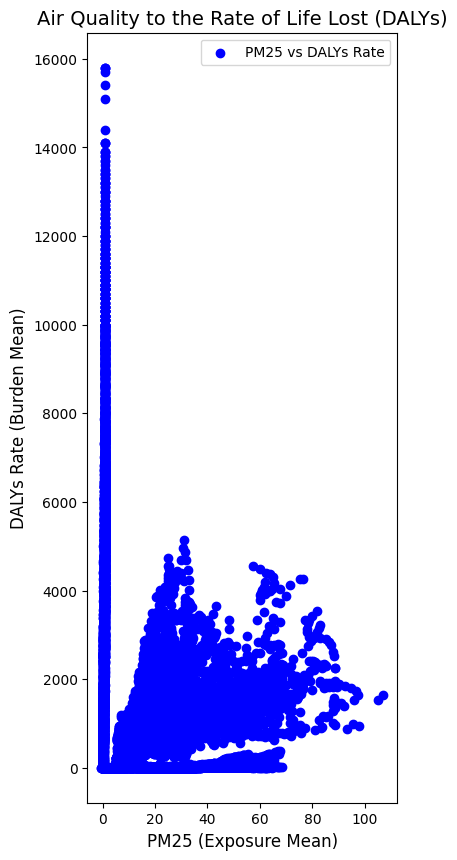

In [6]:
# Plot the updated scatter plot
plt.figure(figsize=(4, 10))
plt.scatter(AQH['Exposure Mean'], AQH['Burden Mean'], label='PM25 vs DALYs Rate', color='blue')

# Title and axis labels
plt.title("Air Quality to the Rate of Life Lost (DALYs)", fontsize=14)
plt.xlabel("PM25 (Exposure Mean)", fontsize=12)
plt.ylabel("DALYs Rate (Burden Mean)", fontsize=12)

# Adding a legend for the plot
plt.legend(loc='upper right')

# Display the plot
plt.show()

## 2.3. Pattern Reconition

In [7]:
# Get the unique country names
country_names = AQH['Country'].unique()
country_names_list = country_names.tolist()
# Display the list of country names 
print(country_names)

['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso' 'Burundi'
 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada' 'Central African Republic'
 'Chad' 'Chile' 'China' 'Colombia' 'Comoros' 'Congo' 'Cook Islands'
 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czechia' "Côte d'Ivoire"
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji' 'Finland' 'France'
 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Greenland'
 'Grenada' 'Guam' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti'
 'Honduras' 

In [8]:
#Choosing country and pollutant type for the model training
country_name = "Afghanistan"
# country_name = "Mexico"
pollutant_type = "pm25"

country_data = AQH[(AQH['Country'] == country_name) & (AQH['Pollutant'] == pollutant_type)] 
country_data

,Country,Year,Pollutant,Exposure Mean,Units,Burden Mean,Measure,Metric,Cause Name
18972,Afghanistan,1990,pm25,64.2,µg/m3,2270.0,daly,rate,All causes
18973,Afghanistan,1991,pm25,64.2,µg/m3,2140.0,daly,rate,All causes
18974,Afghanistan,1992,pm25,64.2,µg/m3,1990.0,daly,rate,All causes
18975,Afghanistan,1993,pm25,64.2,µg/m3,1860.0,daly,rate,All causes
18976,Afghanistan,1994,pm25,64.3,µg/m3,1760.0,daly,rate,All causes
18977,Afghanistan,1995,pm25,64.4,µg/m3,1670.0,daly,rate,All causes
18978,Afghanistan,1996,pm25,64.5,µg/m3,1610.0,daly,rate,All causes
18979,Afghanistan,1997,pm25,64.6,µg/m3,1530.0,daly,rate,All causes
18980,Afghanistan,1998,pm25,64.8,µg/m3,1460.0,daly,rate,All causes
18981,Afghanistan,1999,pm25,64.9,µg/m3,1400.0,daly,rate,All causes


## 2.4. Clean Outliner

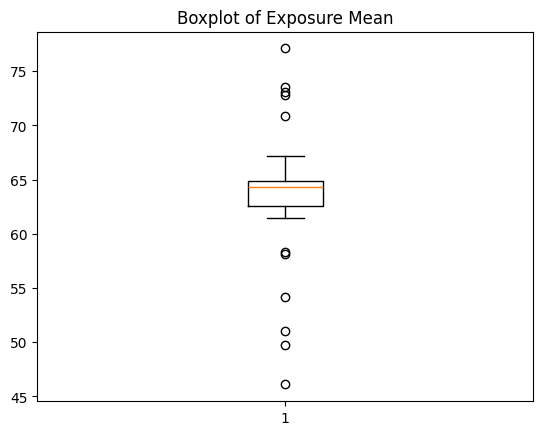

In [9]:
#Visualise the outlier Exposure Mean
plt.boxplot(country_data['Exposure Mean'])
plt.title('Boxplot of Exposure Mean')
plt.show()

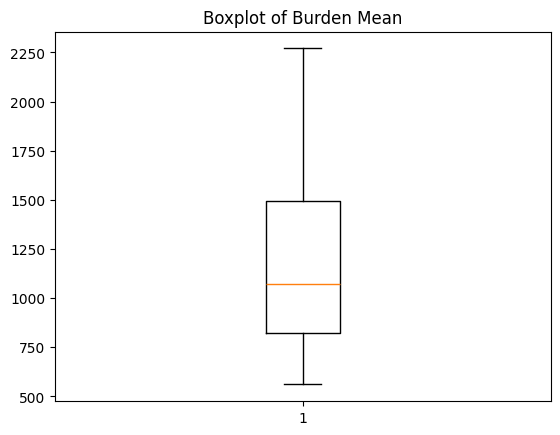

In [10]:
#Visualise the outlier Burden Mean
plt.boxplot(country_data['Burden Mean'])
plt.title('Boxplot of Burden Mean')
plt.show()

In [ ]:
def clean_outliner(data,x, y):
    #Clean Outliner with IQR method
    # Calculate Q1 (25th percentile) and Q3 (75th percentile) for 'Exposure Mean'
    Q1_x = x.quantile(0.25)
    Q3_x = x.quantile(0.75)
    IQR_x = Q3_x - Q1_x

    # Calculate lower and upper bounds for 'Exposure Mean'
    lower_bound_x = Q1_x - 1.5 * IQR_x
    upper_bound_x = Q3_x + 1.5 * IQR_x

    # Calculate Q1 and Q3 for 'Burden Mean'
    Q1_y = y.quantile(0.25)
    Q3_y = y.quantile(0.75)
    IQR_y = Q3_y - Q1_y

    # Calculate lower and upper bounds for 'Burden Mean'
    lower_bound_y = Q1_y - 1.5 * IQR_y
    upper_bound_y = Q3_y + 1.5 * IQR_y

    # Remove outliers from both 'Exposure Mean' and 'Burden Mean'
    return data[
        (x >= lower_bound_x) & (x <= upper_bound_x) & 
        (y >= lower_bound_y) & (y <= upper_bound_y)
    ]

country_data_cleaned = clean_outliner(country_data, country_data['Exposure Mean'],country_data['Burden Mean'])

In [12]:
country_data_cleaned = clean_outliner(country_data, country_data['Exposure Mean'],country_data['Burden Mean'])

In [12]:
#Clean Outliner with IQR method
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for 'Exposure Mean'
Q1_exposure = country_data['Exposure Mean'].quantile(0.25)
Q3_exposure = country_data['Exposure Mean'].quantile(0.75)
IQR_exposure = Q3_exposure - Q1_exposure

# Calculate lower and upper bounds for 'Exposure Mean'
lower_bound_exposure = Q1_exposure - 1.5 * IQR_exposure
upper_bound_exposure = Q3_exposure + 1.5 * IQR_exposure

# Calculate Q1 and Q3 for 'Burden Mean'
Q1_burden = country_data['Burden Mean'].quantile(0.25)
Q3_burden = country_data['Burden Mean'].quantile(0.75)
IQR_burden = Q3_burden - Q1_burden

# Calculate lower and upper bounds for 'Burden Mean'
lower_bound_burden = Q1_burden - 1.5 * IQR_burden
upper_bound_burden = Q3_burden + 1.5 * IQR_burden

# Remove outliers from both 'Exposure Mean' and 'Burden Mean'
country_data_cleaned = country_data[
    (country_data['Exposure Mean'] >= lower_bound_exposure) & (country_data['Exposure Mean'] <= upper_bound_exposure) & 
    (country_data['Burden Mean'] >= lower_bound_burden) & (country_data['Burden Mean'] <= upper_bound_burden)
]


## 2.5. Normalize data

In [13]:
#Normalize data in a scale of min and max value from 0 to 1 scale
def normalize_data(x,y):
    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()
    # print(scaler_X,scaler_y)
    X_scaled = scaler_X.fit_transform(x)  # Normalize features
    y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))  # Normalize target
    return X_scaled, y_scaled, scaler_X, scaler_y

In [14]:
#Normalize data in a scale of min and max value from 0 to 1 scale
x, y, scaler_X, scaler_y = normalize_data(country_data_cleaned[['Exposure Mean']],country_data_cleaned['Burden Mean'])

## 2.5.1 Denormalize data

In [15]:
# Denormalize a single data point to the original scale
def denormalize_single(value, scaler):
    # Convert to 2D array for scaler compatibility, then return the original value
    original_value = scaler.inverse_transform(np.array([[value]]))
    return original_value[0, 0]


In [16]:
x = denormalize_single(0.4,scaler_X)
y = denormalize_single(0.4,scaler_y)

In [ ]:
"""
Full Function for Backend Application
"""
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Normalize data in a scale of min and max value from 0 to 1 scale
def normalize_data(x, y):
    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()
    
    X_scaled = scaler_X.fit_transform(x)  # Normalize features
    y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))  # Normalize target
    
    return X_scaled, y_scaled, scaler_X, scaler_y

# Denormalize a single data point to the original scale
def denormalize_single_value(value, scaler):
    original_value = scaler.inverse_transform(np.array([[value]]))
    return original_value[0, 0]

# Example normalization
x, y, scaler_X, scaler_y = normalize_data(country_data_cleaned[['Exposure Mean']], country_data_cleaned['Burden Mean'])

#Split and Suffle the data into training and test sets (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Initialize the Linear Regression model
lr = LinearRegression()

#Train the model
lr.fit(x_train, y_train)

"""
Application:
    - First, user send data as 'input_test'
    - Then, using 'input_test' to predict via trained model
    - After send to model, it return result as 'y_single', however, 'y_single' still in the normalize format
    - So we need to denormalize it via "denormalize_single_value()" as 'predicted_y'

"""
input_test = 0.3
y_single = lr.predict([[input_test]])

predicted_y  = denormalize_single_value(y_single[0][0], scaler_y)
print(f"User input used for predicting: {input_test}")
print(f"Normalised Predicted value: {y_single[0][0]}")
print(f"Denormalised Predicted value: {predicted_y}")



User input used for predicting: 0.3
Normalised Predicted value: 0.49424833464304707
Denormalised Predicted value: 1474.4526303935131


## 2.6. Load Data or Save data as CSV file

In [ ]:
import os

# Define the folder path and file path
folder_path = '../datasets/regression/'
file_path = os.path.join(folder_path, f'{country_name}.csv')

# Check if the folder exists, if not, create it
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    print(f"Folder '{folder_path}' created.")

# Check if the file exists
# if not os.path.exists(file_path):
#     # Export the DataFrame to CSV
#     country_data_cleaned.to_csv(file_path, index=True)
#     print(f"File '{file_path}' has been created.")
# else:
#     print(f"File '{file_path}' already exists.")

"""Noted that in our '../processed_data/regression/' will automatically save 
processed_data of the country that not existing in the directory"""

"Noted that in our '../processed_data/regression/' will automatically save \nprocessed_data of the country that not existing in the directory"

## 2.7. Data Splitting and Shuffling

In [16]:
#Split and Suffle the data into training and test sets (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## 2.8. Visualize data training

C:\Users\krazy\AppData\Local\Temp\ipykernel_43560\3653706735.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right')


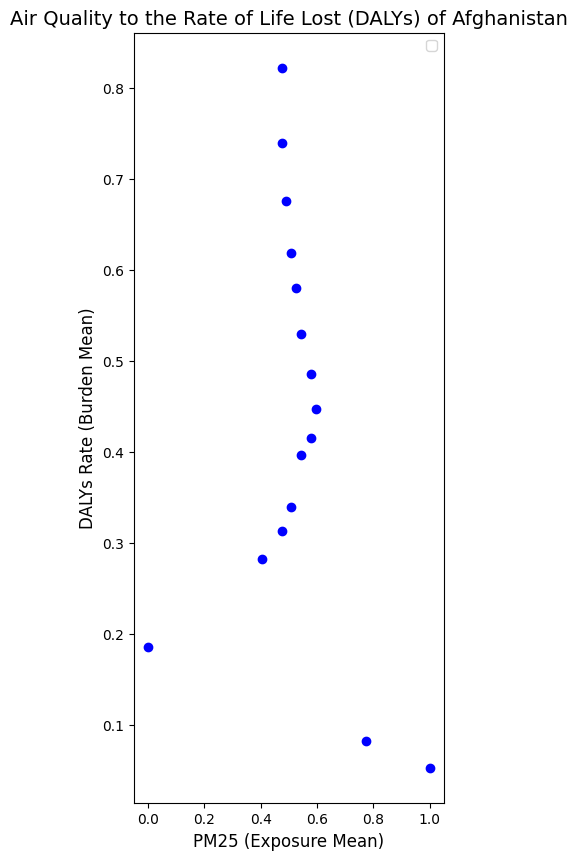

In [17]:
#Visualise the scatter plot for the training data
plt.figure(figsize=(4, 10))
plt.scatter(x_train,y_train, color='blue')
plt.title(f"Air Quality to the Rate of Life Lost (DALYs) of {country_name}", fontsize=14)
plt.xlabel("PM25 (Exposure Mean)", fontsize=12)
plt.ylabel("DALYs Rate (Burden Mean)", fontsize=12)

# Adding a legend for the plot
plt.legend(loc='upper right')
plt.show()

# 3. Model Selection, Training, and Evaluation

## 3.1. Linear Regression

In [18]:
#Initialize the Linear Regression model
lr = LinearRegression()

#Train the model
lr.fit(x_train, y_train)

#Make predictions on the test data
y_pred = lr.predict(x_test)

#Evaluate the model using Mean Squared Error and R^2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the evaluation metrics
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 0.22
R-squared: -0.22


## 3.2. Polynomial Regression

In [19]:
#Transform data for Polynomial Regression
poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(x_train)
X_test_poly = poly.transform(x_test)

In [20]:
#Initialize the Linear Regression model for transformed data
lr_poly = LinearRegression()

#Train the model
lr_poly.fit(X_train_poly, y_train)

#Make predictions on the test data
y_pred_poly = lr_poly.predict(X_test_poly)

#Evaluate the model using Mean Squared Error and R^2 score
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

# Output the evaluation metrics
print(f"Mean Squared Error: {mse_poly:.2f}")
print(f"R-squared: {r2_poly:.2f}")

Mean Squared Error: 0.09
R-squared: 0.49


# 4. Visualize Regression Model Result

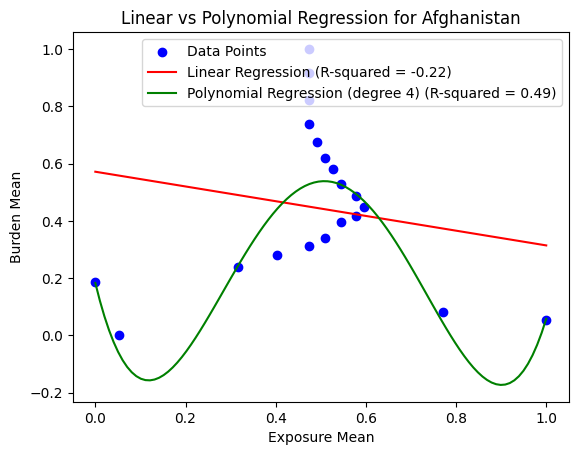

In [21]:
# Visualizing the Results
# Create a grid of values for Exposure Mean for smoother lines
X_grid = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)

# Linear predictions for visualization
y_pred_linear = lr.predict(X_grid)

# Polynomial predictions for visualization
X_grid_poly = poly.transform(X_grid)
y_pred_poly = lr_poly.predict(X_grid_poly)

# Plotting the original data points
plt.scatter(x, y, color='blue', label='Data Points')

# Plotting the Linear Regression line
plt.plot(X_grid, y_pred_linear, color='red', label=f'Linear Regression (R-squared = {r2:.2f})')

# Plotting the Polynomial Regression curve
plt.plot(X_grid, y_pred_poly, color='green', label=f'Polynomial Regression (degree 4) (R-squared = {r2_poly:.2f})')

# Adding titles and labels
plt.title(f'Linear vs Polynomial Regression for {country_name}')
plt.xlabel('Exposure Mean')
plt.ylabel('Burden Mean')
plt.legend()

# Show the plot
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=84e791e6-3df4-4633-80d7-0ccea97596a2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>